In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'population', 'capacity_school']]
blocks_gdf = blocks_gdf.rename(columns={'capacity_school':'capacity'})
blocks_gdf.head()

geometry  population  capacity
id                                                                         
0   POLYGON ((354918.622 6625258.829, 354901.464 6...         606       0.0
1   POLYGON ((355412.142 6623378.149, 355411.700 6...          41       0.0
2   POLYGON ((353934.329 6625429.433, 353923.453 6...          14       0.0
3   POLYGON ((355099.099 6623847.765, 355074.808 6...         581       0.0
4   POLYGON ((352766.168 6621954.748, 352744.412 6...        2004       0.0

In [2]:
import pandas as pd

accessibility_matrix = pd.read_pickle('./../data/accessibility_matrix.pickle')
accessibility_matrix.head()

0          1          2         3          4          5          6      \
0   0.000000  18.718750   9.234375  17.21875  30.296875  27.390625  30.671875   
1  17.859375   0.000000  19.015625   7.65625  20.281250  25.250000  25.234375   
2   9.234375  20.796875   0.000000  20.21875  27.968750  25.062500  28.343750   
3  15.937500   7.449219  18.421875   0.00000  21.109375  24.984375  27.781250   
4  31.906250  19.765625  31.734375  21.28125   0.000000  21.781250  23.125000   

       7        8        9      ...    16310     16311     16312    16313  \
0  23.281250  78.6875  81.2500  ...  76.5625  102.5625   97.5000  132.250   
1  15.765625  76.8750  79.4375  ...  74.6875  100.7500   95.6875  130.500   
2  20.953125  71.8750  74.4375  ...  69.7500   95.8125   90.6875  125.500   
3  16.593750  76.3125  78.8125  ...  74.1250  100.1875   95.0625  129.875   
4  15.429688  89.5625  92.1250  ...  87.4375  113.5000  108.3750  143.125   

      16314    16315    16316    16317    16318     16319  
0  130.8750  142.125  247.625  228.625  247.625  124.6250  
1  129.0000  140.250  245.875  226.875  245.875  112.5000  
2  124.0625  135.375  240.875  221.875  240.875  124.6250  
3  128.5000  139.750  245.250  226.250  245.250  113.3750  
4  141.7500  153.000  258.500  239.500  258.500  108.3125  

[5 rows x 16320 columns]

## Competitive

In [3]:
from blocksnet.config import service_types_config
_, demand, accessibility = service_types_config['school'].values()
demand, accessibility

(120, 15)

In [4]:
from blocksnet.analysis.provision import competitive_provision

blocks_df, links_df = competitive_provision(blocks_gdf, accessibility_matrix, accessibility, demand, max_depth=1)

2025-03-26 21:12:34.324 | INFO     | blocksnet.analysis.provision.competivive.core:_initialize_provision_df:29 - Initializing provision DataFrame
2025-03-26 21:12:34.325 | WARNING  | blocksnet.analysis.provision.competivive.core:_initialize_provision_df:33 - No demand in columns. Imputing using population column and demand parameter
2025-03-26 21:12:34.343 | INFO     | blocksnet.analysis.provision.competivive.core:_supply_self:56 - Supplying blocks with own capacities


2025-03-26 21:12:34.514 | INFO     | blocksnet.analysis.provision.competivive.core:competitive_provision:173 - Setting and solving LP problems until max depth or break condition reached
100%|██████████| 1/1 [00:15<00:00, 15.34s/it]
2025-03-26 21:12:49.855 | SUCCESS  | blocksnet.analysis.provision.competivive.core:competitive_provision:184 - Provision assessment finished


In [6]:
blocks_df.head()

demand  capacity  demand_left  demand_within  demand_without  \
id                                                                 
0       73         0           73              0               0   
1        5         0            5              0               0   
2        2         0            2              0               0   
3       70         0           70              0               0   
4      240         0          144             96               0   

    capacity_left  capacity_within  capacity_without  provision_strong  \
id                                                                       
0               0                0                 0               0.0   
1               0                0                 0               0.0   
2               0                0                 0               0.0   
3               0                0                 0               0.0   
4               0                0                 0               0.4   

    provision_weak  
id                  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.4

In [7]:
from blocksnet.analysis.provision import provision_strong_total, provision_weak_total

p_strong = provision_strong_total(blocks_df)
p_weak = provision_weak_total(blocks_df)

p_strong, p_weak

(0.6421946198505771, 0.6421946198505771)

In [8]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,10))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='provision_strong', cmap='RdYlGn', vmin=0, vmax=1, legend=True)
ax.set_title(f'Pstrong = {round(p_strong, 2)}, Pweak = {round(p_weak, 2)}')
ax.set_axis_off()

## Shared

In [9]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/parks.parquet')
blocks_gdf.head()

geometry  population  capacity
id                                                                         
0   POLYGON ((354918.622 6625258.829, 354901.464 6...         606       0.0
1   POLYGON ((355412.142 6623378.149, 355411.700 6...          41       0.0
2   POLYGON ((353934.329 6625429.433, 353923.453 6...          14       0.0
3   POLYGON ((355099.099 6623847.765, 355074.808 6...         581       0.0
4   POLYGON ((352766.168 6621954.748, 352744.412 6...        2004       0.0

In [10]:
from blocksnet.analysis.provision import shared_provision

accessibility = 30
blocks_df = shared_provision(blocks_gdf, accessibility_matrix, accessibility)

2025-03-26 21:12:55.941 | INFO     | blocksnet.analysis.provision.shared.core:_initialize_provision_df:17 - Initializing provision DataFrame


2025-03-26 21:12:58.192 | SUCCESS  | blocksnet.analysis.provision.shared.core:shared_provision:61 - Provision assessment finished


In [11]:
blocks_df.head()

population  capacity  capacity_within  population_within  load  provision
id                                                                           
0          606         0                0              66108   NaN        0.0
1           41         0                0             136140   NaN        0.0
2           14         0                0              70975   NaN        0.0
3          581         0                0             126898   NaN        0.0
4         2004         0                0              95421   NaN        0.0

`Provision` - how much capacity within the accessibility is provided per resident of the block

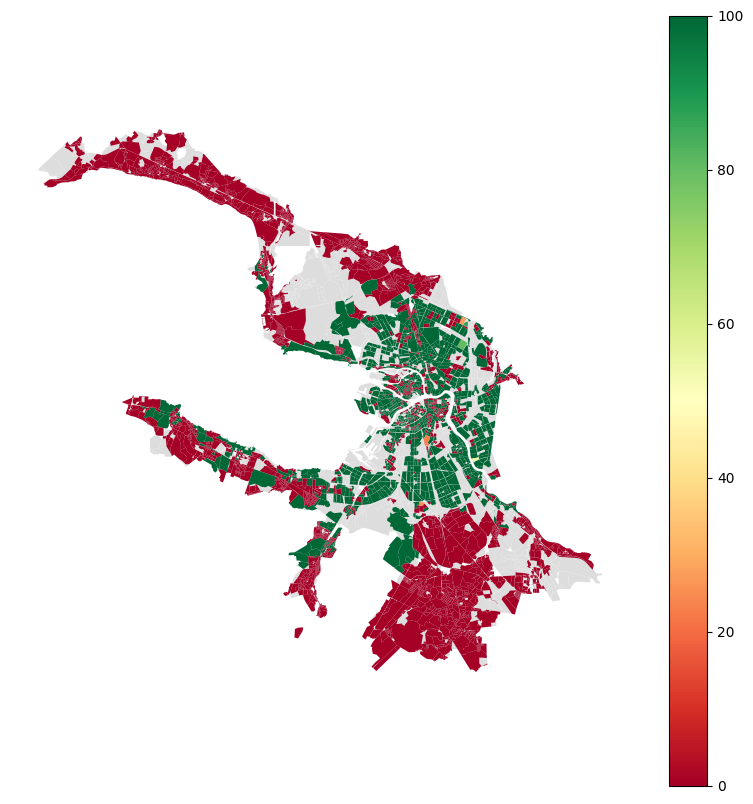

In [12]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,10))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='provision', cmap='RdYlGn', vmin=0, vmax=100, legend=True).set_axis_off()

`Load` - how much population within the accessibility is provided by the capacity of the block

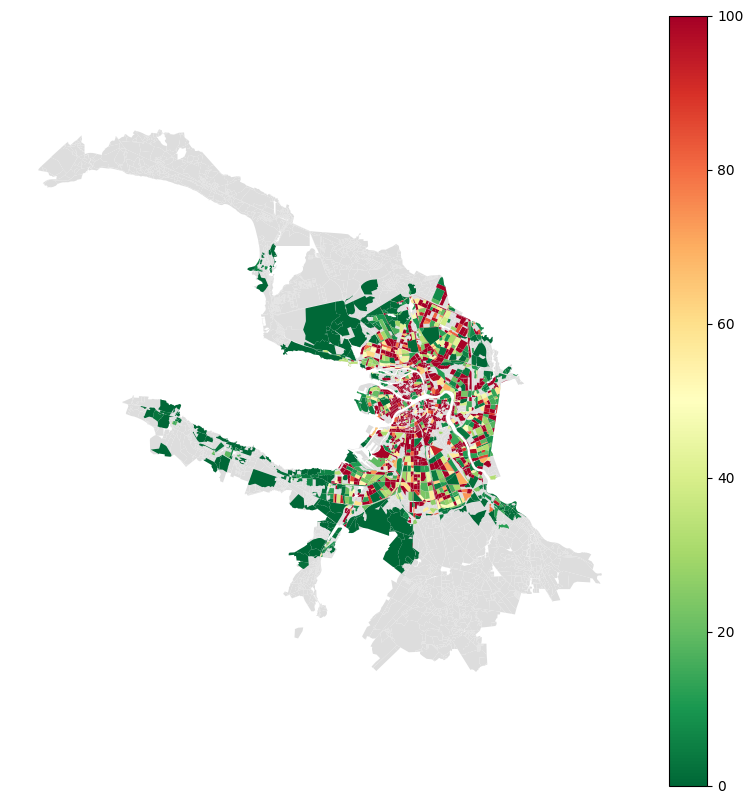

In [13]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,10))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='load', cmap='RdYlGn_r', vmin=0, vmax=100, legend=True).set_axis_off()

## Diversity

In [14]:
df = gpd.read_parquet('./../data/services.parquet').groupby(['block_id', 'service_type']).size().unstack(fill_value=0)
df.head()

service_type  bakery  bank  bar  beach  bowling_alley  cafe  cemetery  cinema  \
block_id                                                                        
0                  0     0    0      0              0     1         0       0   
1                  0     1    0      0              0     0         0       0   
2                  0     0    0      0              0     0         0       0   
3                  0     0    0      0              0     0         0       0   
4                  1     0    0      0              0     2         0       0   

service_type  circus  convenience  ...  stadium  substation  supermarket  \
block_id                           ...                                     
0                  0            1  ...        0           0            0   
1                  0            2  ...        0           0            0   
2                  0            0  ...        0           0            0   
3                  0            0  ...        0           0            0   
4                  0            0  ...        0           0            0   

service_type  swimming_pool  theatre  train_building  university  \
block_id                                                           
0                         0        0               0           0   
1                         0        0               0           0   
2                         0        0               0           0   
3                         0        0               0           0   
4                         0        0               0           0   

service_type  wastewater_plant  water_works  zoo  
block_id                                          
0                            0            0    0  
1                            0            0    0  
2                            0            0    0  
3                            0            0    0  
4                            0            0    0  

[5 rows x 43 columns]

In [15]:
dfs = [df[[column]].rename(columns={column: 'count'}) for column in df.columns]
dfs[0].head()

service_type  count
block_id           
0                 0
1                 0
2                 0
3                 0
4                 1

In [16]:
from blocksnet.analysis.provision import shannon_diversity

shannon = shannon_diversity(dfs)
shannon.head()

count  shannon_diversity
block_id                          
0             4           1.386294
1             3           1.011404
2             1           0.693147
3             3           1.242453
4            10           1.497866

In [17]:
blocks_gdf[['geometry']].join(shannon[['shannon_diversity']]).fillna(0).plot(column='shannon_diversity', cmap='RdYlGn', vmin=0, legend=True, figsize=(10,10)).set_axis_off()